In [1]:
# Cargando las librerías por categoría
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Generic
import os
import datetime
import itertools
import warnings
warnings.filterwarnings("ignore")

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn import tree
import xgboost as xgb
## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score

from sklearn.preprocessing import LabelEncoder

import sklearn

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

#Técnicas de rebalanceo
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import pickle

In [5]:
#Cargamos los datos ya tratados tras el EDA
ruta=("/content/Modelar_EDA.pkl")
df= pd.read_pickle(ruta)

In [6]:
df.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0,Q_B_2_0_0,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0,Q_NIR_8_0_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
0,35984B9C3E7CD9A1,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,1342.002466,1572.003418,1943.686816,6512.787270,1.283357e-10,428.996347,574.000940,676.002960,778.003931,880.999176,997.000220,1130.001782,1311.997949,1626.996155,8627.098641,155.003632,402.000092,458.999939,510.000061,567.999939,632.000610,681.000916,726.109186,791.000269,902.999719,1980.172280,0.000013,892.016479,1244.014185,1497.998303,1731.204688,1944.003906,2160.996533,2410.995264,2719.999756,3180.000342,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002.0,0.0,1,5
1,F9D04BF6D037F8FB,2189757160,165463267,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,1316.000110,1505.990771,1804.993469,6269.935600,1.352518e-11,433.998392,565.000110,662.996521,746.001318,828.998413,912.000330,1011.997162,1142.202637,1384.994580,5357.790999,120.000275,419.000000,472.999939,509.999808,541.999976,572.000000,602.999939,636.000122,673.000122,745.000000,3647.195402,0.000030,846.002728,1139.006982,1363.993860,1558.000513,1749.993713,1956.000464,2194.001978,2507.001416,3012.991675,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949.0,1.0,7,5
2,B89D5711AFF8C423,2240147335,165690752,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,1168.995544,1375.008179,1719.003235,5010.767611,0.000000e+00,379.001587,507.003815,600.000519,684.000488,768.997528,867.001587,992.991760,1165.998413,1443.000366,5240.232771,83.000389,363.000031,429.002502,473.000015,510.000092,549.000244,590.999939,635.999817,692.999817,796.498779,1947.739721,0.000005,807.001373,1124.002441,1365.009583,1570.995117,1768.992798,1978.989258,2228.999146,2561.999756,3088.000488,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986.0,1.0,4,5
3,1C3478AC1522E7E4,2227146459,165934099,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,955.002960,1136.997144,1447.997290,5465.430281,6.341585e-06,310.999088,405.998712,485.000607,558.997925,641.001007,731.994189,838.004376,974.797485,1217.996167,5343.168796,0.001450,256.999487,295.999969,329.000092,366.000043,411.000549,457.000061,506.000000,565.999817,663.999817,1424.396092,0.002285,1200.994470,1476.001294,1678.005042,1848.001782,2022.988464,2211.993506,2433.003687,2740.996582,3349.986328,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999.0,1.0,1,5
4,4D12AA5009064345,2212350459,165681791,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,1175.993103,1401.000488,1756.994141,7376.529218,0.000000e+00,284.000534,421.002472,526.003815,618.998779,705.999268,801.005432,912.999451,1069.996094,1348.497314,7460.394534,193.000626,431.505035,462.999939,492.000061,519.000427,547.000061,578.999878,617.999603,662.999939,750.000488,1940.403140,0.000000,529.004425,790.996704,999.001617,1183.995239,1355.992920,1535.998779,1725.498962,1954.991455,2315.991455,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966.0,8.0,5,5


In [8]:
df.shape 

(36392, 56)

In [9]:
df.size 

2037952

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36392 entries, 0 to 36398
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  36392 non-null  object 
 1   X                   36392 non-null  int64  
 2   Y                   36392 non-null  int64  
 3   Q_R_4_0_0           36392 non-null  float64
 4   Q_R_4_0_1           36392 non-null  float64
 5   Q_R_4_0_2           36392 non-null  float64
 6   Q_R_4_0_3           36392 non-null  float64
 7   Q_R_4_0_4           36392 non-null  float64
 8   Q_R_4_0_5           36392 non-null  float64
 9   Q_R_4_0_6           36392 non-null  float64
 10  Q_R_4_0_7           36392 non-null  float64
 11  Q_R_4_0_8           36392 non-null  float64
 12  Q_R_4_0_9           36392 non-null  float64
 13  Q_R_4_1_0           36392 non-null  float64
 14  Q_G_3_0_0           36392 non-null  float64
 15  Q_G_3_0_1           36392 non-null  float64
 16  Q_G_

In [12]:
#Creamos las variables X  e Y
X=df.drop(['ID','GEOM_R1','GEOM_R2','GEOM_R3','GEOM_R4'],axis=1)
y=df['CLASE']

In [13]:
#Separamos los datos en proporcion 80/20 (train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)

Creación de modelos mediante la utilización de distintos clasificadores

In [14]:
#Aplicamos el clasificador de árbol de decisión
clf_ros = tree.DecisionTreeClassifier()
clf_ros.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
#Creamos la variable de predicción con el modelo creado
predicted_log_ros = clf_ros.predict(X_test)

In [16]:
# Cáluclo del score
logreg_score_ros = round(clf_ros.score(X_train,y_train) * 100, 2)

print(logreg_score_ros)

print(classification_report(y_test, predicted_log_ros))

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       311
           2       1.00      1.00      1.00       137
           3       1.00      1.00      1.00        97
           4       1.00      1.00      1.00       216
           5       1.00      1.00      1.00      6354
           6       1.00      1.00      1.00       141

    accuracy                           1.00      7279
   macro avg       1.00      1.00      1.00      7279
weighted avg       1.00      1.00      1.00      7279



In [17]:
#Aplicación del clasificador de k vecinos
model = KNeighborsClassifier(3).fit(X_train, y_train)
model

KNeighborsClassifier(n_neighbors=3)

In [18]:
predicted_knn = model.predict(X_test)
predicted_knn

array([5, 5, 5, ..., 5, 5, 5])

In [19]:
# Confidence score
knn_score_2 = round(model.score(X_train,y_train) * 100, 2)
print(knn_score_2)
print(classification_report(y_test, predicted_knn))

90.41
              precision    recall  f1-score   support

           0       0.27      0.17      0.21        23
           1       0.50      0.38      0.43       311
           2       0.14      0.06      0.08       137
           3       0.05      0.02      0.03        97
           4       0.10      0.02      0.03       216
           5       0.90      0.97      0.93      6354
           6       0.29      0.04      0.06       141

    accuracy                           0.87      7279
   macro avg       0.32      0.24      0.25      7279
weighted avg       0.82      0.87      0.84      7279



In [20]:
model.score(X_test,y_test)

0.8660530292622614

In [21]:
#Clasificación por GradientBoost
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=5, n_estimators=100, 
                        num_classes=7)

clf.fit(X_train, y_train)  

XGBClassifier(max_depth=5, num_classes=7, objective='multi:softprob')

In [22]:
predicted_gb_mc = clf.predict(X_test)
predicted_gb_mc

array([5, 5, 5, ..., 5, 5, 4])

In [23]:
clf.score(X_test,y_test)

1.0

In [24]:
print(classification_report(y_test, predicted_gb_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       311
           2       1.00      1.00      1.00       137
           3       1.00      1.00      1.00        97
           4       1.00      1.00      1.00       216
           5       1.00      1.00      1.00      6354
           6       1.00      1.00      1.00       141

    accuracy                           1.00      7279
   macro avg       1.00      1.00      1.00      7279
weighted avg       1.00      1.00      1.00      7279



In [25]:
# Linear Discriminant Analysis - default
LDA_Model = LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, y_train,
                         n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.87291774 0.87291774 0.86707883 0.86808657 0.87083476]


87.04

In [26]:
# Linear Discriminant Analysis - f1 macro
LDA_Model = LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, y_train,
                         n_jobs=4, scoring='f1_macro')

print(scores)
round(np.mean(scores)*100, 2)

[0.26357165 0.27414303 0.25425756 0.2938685  0.29415921]


27.6

In [27]:
# Linear Discriminant Analysis - f1 weighted
LDA_Model = LinearDiscriminantAnalysis()

scores = cross_val_score(LDA_Model, X_train, y_train,
                         n_jobs=4, scoring='f1_weighted')

print(scores)
round(np.mean(scores)*100, 2)

[0.84231033 0.84291076 0.83999207 0.84107839 0.84430505]


84.21

In [28]:
#Comprobamos los tipos de métricas que podemos utilizar para evaluar los modelos
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [29]:
#Ajustamos los datos al modelo de LDA
LDA_Model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [30]:
predicted_lda = LDA_Model.predict(X_test)
predicted_lda

array([5, 5, 5, ..., 5, 5, 5])

In [31]:
# Confidence score aplicado al y_test (LDA)
logreg_score = round(LDA_Model.score(X_train,y_train) * 100, 2)

print(logreg_score)

print(classification_report(y_test, predicted_lda))

87.19
              precision    recall  f1-score   support

           0       0.42      0.65      0.51        23
           1       0.39      0.43      0.41       311
           2       0.00      0.00      0.00       137
           3       0.26      0.15      0.19        97
           4       0.19      0.03      0.05       216
           5       0.91      0.97      0.94      6354
           6       0.00      0.00      0.00       141

    accuracy                           0.87      7279
   macro avg       0.31      0.32      0.30      7279
weighted avg       0.82      0.87      0.84      7279



In [32]:
# Logistic Regression - default
lr_Model = LogisticRegression()

scores = cross_val_score(lr_Model, X_train, y_train,
                         n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.87566546 0.87549373 0.87549373 0.87564411 0.87564411]


87.56

In [33]:
lr_model = LogisticRegression(random_state=0).fit(X_train, y_train)

In [34]:
predicted_lr = lr_model.predict(X_test)
predicted_lr

array([5, 5, 5, ..., 5, 5, 5])

In [35]:
# Confidence score aplicado al y_test (Logistic Regression)
logreg_score = round(lr_model.score(X_train,y_train) * 100, 2)

print(logreg_score)

print(classification_report(y_test, predicted_lr))

87.56
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00       311
           2       0.00      0.00      0.00       137
           3       0.00      0.00      0.00        97
           4       0.00      0.00      0.00       216
           5       0.87      1.00      0.93      6354
           6       0.00      0.00      0.00       141

    accuracy                           0.87      7279
   macro avg       0.12      0.14      0.13      7279
weighted avg       0.76      0.87      0.81      7279



In [36]:
# Logistic Regression - f1_weighted
lr_Model_2 = LogisticRegression()

scores = cross_val_score(lr_Model_2, X_train, y_train,
                         n_jobs=4, scoring='f1_weighted')

print(scores)
round(np.mean(scores)*100, 2)

[0.81761915 0.81737333 0.81737333 0.81758858 0.81758858]


81.75

In [37]:
lr_model_2 = LogisticRegression(random_state=0).fit(X_train, y_train)

In [38]:
predicted_lr = lr_model_2.predict(X_test)
predicted_lr

array([5, 5, 5, ..., 5, 5, 5])

In [39]:
# Confidence score aplicado al y_test (Logistic Regression)
logreg_score = round(lr_model_2.score(X_train,y_train) * 100, 2)

print(logreg_score)

print(classification_report(y_test, predicted_lr))

87.56
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00       311
           2       0.00      0.00      0.00       137
           3       0.00      0.00      0.00        97
           4       0.00      0.00      0.00       216
           5       0.87      1.00      0.93      6354
           6       0.00      0.00      0.00       141

    accuracy                           0.87      7279
   macro avg       0.12      0.14      0.13      7279
weighted avg       0.76      0.87      0.81      7279



In [40]:
# Random Forest Classifier Model - default

RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, y_train, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.98626138 0.97733127 0.98712004 0.9881484  0.98282377]


98.43

In [41]:
RFC_model = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

In [42]:
predicted_rf = RFC_model.predict(X_test)
predicted_rf

array([5, 5, 5, ..., 5, 5, 4])

In [43]:
# Confidence score aplicado al y_test (Random Forest)
rf_score = round(RFC_model.score(X_train,y_train) * 100, 2)

print(rf_score)

print(classification_report(y_test, predicted_rf))

99.98
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.90      0.96      0.93       311
           2       0.83      0.82      0.82       137
           3       0.89      0.74      0.81        97
           4       0.96      0.96      0.96       216
           5       1.00      1.00      1.00      6354
           6       0.99      0.96      0.98       141

    accuracy                           0.99      7279
   macro avg       0.93      0.90      0.91      7279
weighted avg       0.99      0.99      0.99      7279



In [44]:
# Random Forest Classifier Model - f1_weighted

RFC_model_2 = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, y_train, 
                        n_jobs=4, scoring='f1_weighted')

print(scores)
round(np.mean(scores)*100, 2)

[0.9839004  0.98584052 0.98247585 0.98343396 0.98722107]


98.46

In [45]:
RFC_model_2 = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

In [ ]:
predicted_rf = RFC_model_2.predict(X_test)
predicted_rf

array([1, 4, 5, ..., 5, 5, 2])

In [46]:
# Confidence score aplicado al y_test (Random Forest)
rf_score = round(RFC_model_2.score(X_train,y_train) * 100, 2)

print(rf_score)

print(classification_report(y_test, predicted_rf))

99.98
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.90      0.96      0.93       311
           2       0.83      0.82      0.82       137
           3       0.89      0.74      0.81        97
           4       0.96      0.96      0.96       216
           5       1.00      1.00      1.00      6354
           6       0.99      0.96      0.98       141

    accuracy                           0.99      7279
   macro avg       0.93      0.90      0.91      7279
weighted avg       0.99      0.99      0.99      7279



In [47]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, y_train, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.87566546 0.87549373 0.87549373 0.87564411 0.87564411]


87.56

In [48]:
SVM_Model.fit(X_train, y_train)  

SVC()

In [49]:
predicted_svc = SVM_Model.predict(X_test)
predicted_svc

array([5, 5, 5, ..., 5, 5, 5])

In [50]:
print(classification_report(y_test, predicted_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00       311
           2       0.00      0.00      0.00       137
           3       0.00      0.00      0.00        97
           4       0.00      0.00      0.00       216
           5       0.87      1.00      0.93      6354
           6       0.00      0.00      0.00       141

    accuracy                           0.87      7279
   macro avg       0.12      0.14      0.13      7279
weighted avg       0.76      0.87      0.81      7279



In [51]:
SVM_Model.score(X_test, y_test)  

0.8729221046847094

In [52]:
# Support Vector Machine - f1_weighted
SVM_Model_2 = SVC()

scores = cross_val_score(SVM_Model_2, X_train, y_train, 
                        n_jobs=4, scoring='f1_weighted')

print(scores)
round(np.mean(scores)*100, 2)

[0.81761915 0.81737333 0.81737333 0.81758858 0.81758858]


81.75

In [53]:
SVM_Model_2.fit(X_train, y_train)  

SVC()

In [54]:
predicted_svc = SVM_Model_2.predict(X_test)
predicted_svc

array([5, 5, 5, ..., 5, 5, 5])

In [55]:
# Confidence score aplicado al y_test (SVM)
SVM2_score = round(SVM_Model_2.score(X_train,y_train) * 100, 2)

print(SVM2_score)

print(classification_report(y_test, predicted_rf))

87.56
              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.90      0.96      0.93       311
           2       0.83      0.82      0.82       137
           3       0.89      0.74      0.81        97
           4       0.96      0.96      0.96       216
           5       1.00      1.00      1.00      6354
           6       0.99      0.96      0.98       141

    accuracy                           0.99      7279
   macro avg       0.93      0.90      0.91      7279
weighted avg       0.99      0.99      0.99      7279



Cross Validation

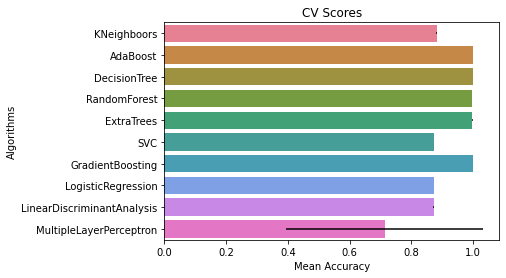

In [ ]:
# Cross validate model with Kfold stratified cross val (tarda 1 hora)
K_fold = StratifiedKFold(n_splits=10)


# Modeling step Test differents algorithms 
random_state = 17

models = [] # append all models or predictive models 
cv_results = [] # cross validation result
cv_means = [] # cross validation mean value
cv_std = [] # cross validation standard deviation

models.append(KNeighborsClassifier())
models.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
models.append(DecisionTreeClassifier(random_state=random_state))
models.append(RandomForestClassifier(random_state=random_state))
models.append(ExtraTreesClassifier(random_state=random_state))
models.append(SVC(random_state=random_state))
models.append(GradientBoostingClassifier(random_state=random_state))
models.append(LogisticRegression(random_state = random_state))
models.append(LinearDiscriminantAnalysis())
models.append(MLPClassifier(random_state=random_state))


for model in models :
    cv_results.append(cross_val_score(model, X_train, y_train, 
                                      scoring = "accuracy", cv = K_fold, n_jobs=4))

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means,
        "CrossValErrors": cv_std,
        "Algorithms":[
                     "KNeighboors",
                     "AdaBoost", 
                     "DecisionTree",   
                     "RandomForest",
                     "ExtraTrees",
                     "SVC",
                     "GradientBoosting",                      
                     "LogisticRegression",
                     "LinearDiscriminantAnalysis",
                     "MultipleLayerPerceptron"]
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,
                palette="husl", orient = "h", **{'xerr':cv_std})

cv_plot.set_xlabel("Mean Accuracy")
cv_plot = cv_plot.set_title("CV Scores")

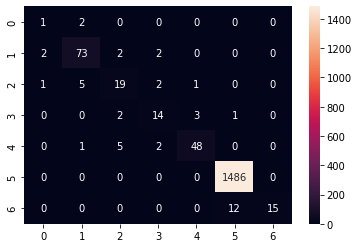

In [ ]:
#matriz de confusión para los resultados de random forest (f1-weighted)
y_pred = RFC_model_2.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred.round())

sns.heatmap(cm2, annot=True, fmt=".0f")

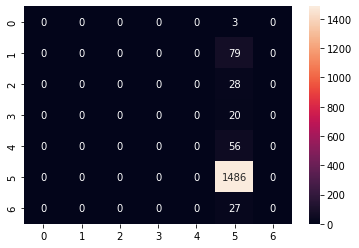

In [ ]:
#matriz de confusión para los resultados de SVM (f1-weighted)
y_pred = SVM_Model_2.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred.round())

sns.heatmap(cm2, annot=True, fmt=".0f")

Tuneo de hiperparámetros

In [ ]:
K_fold = StratifiedKFold(n_splits=5)
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100, 200, 300, 400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


0.9769850891553471

In [ ]:
gsRFC.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [ ]:
clf_GSCV = RandomForestClassifier(max_depth=None, criterion='gini', min_samples_leaf = 1, min_samples_split = 6, n_estimators = 200, random_state=0)

In [ ]:
clf_GSCV.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=6, n_estimators=200, random_state=0)

In [ ]:
predicted_rf = clf_GSCV.predict(X_test)
predicted_rf

array([4, 5, 5, ..., 5, 5, 4])

In [ ]:
# Confidence score aplicado al y_test (RF con tuneo de hiperparámetros)
RF2_score = round(clf_GSCV.score(X_train,y_train))

print(RF2_score)

print(classification_report(y_test, predicted_rf))

1
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.89      0.99      0.94       125
           2       0.88      0.79      0.83        56
           3       0.86      0.74      0.79        34
           4       0.96      0.94      0.95        90
           5       1.00      1.00      1.00      2784
           6       1.00      0.89      0.94        55

    accuracy                           0.99      3154
   macro avg       0.92      0.84      0.87      3154
weighted avg       0.99      0.99      0.99      3154



In [ ]:
K_fold = StratifiedKFold(n_splits=3) #Tarda 43 minutos
### SVC classifier - parameter tuning
SVMC = SVC(probability=True)
svc_param_grid = {
                  'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]
                  }

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train, y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


0.8734112504448234

In [ ]:
gsSVMC.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
SVM_GSCV = SVC(kernel = 'rbf',gamma = 0.0001,C = 1 )

In [ ]:
SVM_GSCV.fit(X_train, y_train)

SVC(C=1, gamma=0.0001)

In [ ]:
predicted_svm = clf_GSCV.predict(X_test)
predicted_svm

array([4, 5, 5, ..., 5, 5, 4])

In [ ]:
# Confidence score aplicado al y_test (SVM con tuneo de hiperparámetros)
SVM2_score = round(SVM_GSCV.score(X_train,y_train))

print(SVM2_score)

print(classification_report(y_test, predicted_svm))

1
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.89      0.99      0.94       125
           2       0.88      0.79      0.83        56
           3       0.86      0.74      0.79        34
           4       0.96      0.94      0.95        90
           5       1.00      1.00      1.00      2784
           6       1.00      0.89      0.94        55

    accuracy                           0.99      3154
   macro avg       0.92      0.84      0.87      3154
weighted avg       0.99      0.99      0.99      3154



Multiclass classification

In [ ]:
#GradientBoost multiclass classification

clf_mc = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=100, 
                        num_classes=7)

clf.fit(X_train, y_train)  

XGBClassifier(max_depth=5, num_classes=7, objective='multi:softprob')

In [ ]:
clf.score(X_test,y_test)

1.0

In [ ]:
predicted_gb_mc = clf.predict(X_test)
predicted_gb_mc

array([6, 5, 4, ..., 5, 5, 5])

In [ ]:
print(classification_report(y_test, predicted_gb_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00       862
           2       1.00      1.00      1.00       353
           3       1.00      1.00      1.00       261
           4       1.00      1.00      1.00       590
           5       1.00      1.00      1.00     18075
           6       1.00      1.00      1.00       434

    accuracy                           1.00     20642
   macro avg       1.00      1.00      1.00     20642
weighted avg       1.00      1.00      1.00     20642



In [ ]:
#Logistic Regression Multiclass
logreg = LogisticRegression(solver = 'lbfgs',multi_class='auto')
logreg.fit(X_train,y_train)


LogisticRegression()

In [ ]:
predicted_lr_mc = logreg.predict(X_test)

In [ ]:
logreg.score(X_test,y_test)

0.8756418951651972

In [ ]:
print(classification_report(y_test, predicted_lr_mc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.00      0.00      0.00       862
           2       0.00      0.00      0.00       353
           3       0.00      0.00      0.00       261
           4       0.00      0.00      0.00       590
           5       0.88      1.00      0.93     18075
           6       0.00      0.00      0.00       434

    accuracy                           0.88     20642
   macro avg       0.13      0.14      0.13     20642
weighted avg       0.77      0.88      0.82     20642



In [ ]:
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=13, max_features = 'auto').fit(X_train, y_train)
clf_2

RandomForestClassifier(max_depth=8, random_state=13)

In [ ]:
clf_2.score(X_train,y_train) 

0.9712479410909796

In [ ]:
predicted_rf_mc = clf_2.predict(X_test)
predicted_rf_mc

array([5, 5, 4, ..., 5, 5, 5])

In [ ]:
print(classification_report(y_test, predicted_rf_mc))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74        67
           1       0.81      0.98      0.89       862
           2       0.88      0.69      0.77       353
           3       0.92      0.59      0.72       261
           4       0.98      0.95      0.96       590
           5       0.98      1.00      0.99     18075
           6       1.00      0.14      0.25       434

    accuracy                           0.97     20642
   macro avg       0.94      0.70      0.76     20642
weighted avg       0.97      0.97      0.96     20642



In [ ]:
#One Versus Rest - Multiclass 
model = SVC()
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X_train, y_train)
# make predictions
yhat = ovr.predict(X)

In [ ]:
ovr.score(X_test,y_test)

0.8942307692307693

In [ ]:
predicted_lr_mc = ovr.predict(X_test)
print(classification_report(y_test, predicted_lr_mc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        17
           5       0.89      1.00      0.94       651
           6       0.00      0.00      0.00        16

    accuracy                           0.89       728
   macro avg       0.15      0.17      0.16       728
weighted avg       0.80      0.89      0.84       728



In [ ]:
#One Versus One - Multiclass 
model_ovo = SVC()
# define the ovr strategy
ovo = OneVsOneClassifier(model_ovo)
# fit model
ovo.fit(X_train, y_train)
# make predictions
yhat = ovo.predict(X)

In [ ]:
ovo.score(X_test,y_test)

0.8942307692307693

In [ ]:
predicted_ovo = ovo.predict(X_test)
print(classification_report(y_test, predicted_ovo))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        17
           5       0.89      1.00      0.94       651
           6       0.00      0.00      0.00        16

    accuracy                           0.89       728
   macro avg       0.15      0.17      0.16       728
weighted avg       0.80      0.89      0.84       728



Técnicas de rebalanceo

In [ ]:
counter = Counter(y_train)
print('Before',counter)

Before Counter({5: 5085, 1: 261, 4: 174, 2: 113, 6: 102, 3: 76, 0: 11})


In [ ]:
#SMOTE
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X, y, test_size=0.20)

In [ ]:
smt = SMOTE()

In [ ]:
print('After',counter)

After Counter({5: 5085, 1: 261, 4: 174, 2: 113, 6: 102, 3: 76, 0: 11})


In [ ]:
clf_sm = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=13, max_features = 'auto').fit(X_train_sm, y_train_sm)
clf_sm

RandomForestClassifier(max_depth=8, random_state=13)

In [ ]:
clf_sm.score(X_test_sm,y_test_sm)

0.9615384615384616

In [ ]:
predicted_rf_sm = clf_sm.predict(X_test_sm)
predicted_rf_sm

array([5, 5, 5, ..., 5, 5, 5])

In [ ]:
print(classification_report(y_test_sm, predicted_rf_sm))

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.79      0.95      0.87        61
           2       0.83      0.67      0.74        30
           3       0.88      0.44      0.58        16
           4       1.00      0.95      0.97        40
           5       0.97      1.00      0.99      1276
           6       0.00      0.00      0.00        29

    accuracy                           0.96      1456
   macro avg       0.78      0.61      0.65      1456
weighted avg       0.94      0.96      0.95      1456



In [ ]:
#NearMiss(undersamping technique)
nm = NearMiss()
x_nm, y_nm = nm.fit_resample(X, y)

In [ ]:
#Creamos el train y test 
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(

    x_nm, y_nm, test_size=0.2, random_state=0

)

In [ ]:
clf_rf_nm = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=13, max_features = 'auto').fit(X_train_nm, y_train_nm)
clf_rf_nm

RandomForestClassifier(max_depth=8, random_state=13)

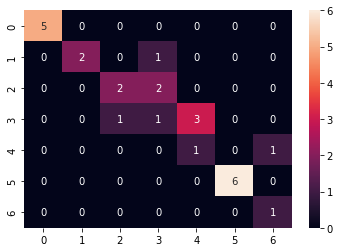

In [ ]:
#Usando NearMiss
y_pred = clf_rf_nm.predict(X_test_nm)

cm2 = confusion_matrix(y_test_nm, y_pred.round())

sns.heatmap(cm2, annot=True, fmt=".0f")

In [ ]:
predicted_log_nm = clf_rf_nm.predict(X_test_nm)

In [ ]:
# Confidence score aplicado al y_test (nearMiss)
logreg_score_nm = round(clf_rf_nm.score(X_train_nm,y_train_nm) * 100, 2)

print(logreg_score_nm)

print(classification_report(y_test_nm, predicted_log_nm))

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.67      0.80         3
           2       0.67      0.50      0.57         4
           3       0.25      0.20      0.22         5
           4       0.25      0.50      0.33         2
           5       1.00      1.00      1.00         6
           6       0.50      1.00      0.67         1

    accuracy                           0.69        26
   macro avg       0.67      0.70      0.66        26
weighted avg       0.73      0.69      0.70        26



In [ ]:
smt = SMOTETomek(random_state=42)

X_res, y_res = smt.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({0: 20677, 3: 19209, 2: 19206, 1: 19159, 6: 18906, 4: 18777, 5: 16923})


In [ ]:
#Creamos el train y test 
X_train_ST, X_test_ST, y_train_ST, y_test_ST = train_test_split(

    X_res, y_res, test_size=0.2, random_state=0

)

In [ ]:
clf_st = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=13, max_features = 'auto').fit(X_train_ST, y_train_ST)
clf_st

RandomForestClassifier(max_depth=8, random_state=13)

In [ ]:
predicted_log_ST = clf_st.predict(X_test_ST)

In [ ]:
# Confidence score aplicado al y_test (SMOTETomek)
logreg_score_st = round(clf_st.score(X_train_ST,y_train_ST) * 100, 2)

print(logreg_score_st)

print(classification_report(y_test_ST, predicted_log_ST))

92.01
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4087
           1       0.97      0.80      0.88      3776
           2       0.90      0.85      0.87      3818
           3       0.78      0.97      0.86      3861
           4       0.91      0.91      0.91      3774
           5       0.89      0.89      0.89      3429
           6       1.00      0.99      1.00      3827

    accuracy                           0.92     26572
   macro avg       0.92      0.92      0.92     26572
weighted avg       0.92      0.92      0.92     26572



In [ ]:
#Tomek Links
tl = TomekLinks()

X_tl, y_tl = tl.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 6184, 2: 5692, 3: 5622, 1: 5613, 4: 5439, 6: 5415, 5: 4865})


In [ ]:
#Creamos el train y test 
X_train_tl, X_test_tl, y_train_tl, y_test_tl = train_test_split(

    X_tl, y_tl, test_size=0.2, random_state=0

)

In [ ]:
#aplicamos el clasificador de bosques aleatorios al modelo TomekLinks creado
clf_tl = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=13, max_features = 'auto').fit(X_train_tl, y_train_tl)
clf_tl

RandomForestClassifier(max_depth=8, random_state=13)

In [ ]:
predicted_log_tl = clf_st.predict(X_test_tl)

In [ ]:
# Confidence score aplicado al y_test (SMOTE Links)
logreg_score_tl = round(clf_tl.score(X_train_tl,y_train_tl) * 100, 2)

print(logreg_score_tl)

print(classification_report(y_test_tl, predicted_log_tl))

99.42
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.83      0.95      0.89        42
           2       0.75      0.86      0.80        14
           3       0.23      1.00      0.37         5
           4       0.16      0.86      0.28        22
           5       1.00      0.90      0.95      1196
           6       1.00      1.00      1.00        11

    accuracy                           0.90      1293
   macro avg       0.71      0.94      0.75      1293
weighted avg       0.97      0.90      0.93      1293



In [ ]:
#random undersampling
rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 18, 1: 18, 2: 18, 3: 18, 4: 18, 5: 18, 6: 18})


In [ ]:
#Creamos el train y test 
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(

    X_res, y_res, test_size=0.2, random_state=0

)

In [ ]:
clf_rus = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=13, max_features = 'auto').fit(X_train_rus, y_train_rus)
clf_rus

RandomForestClassifier(max_depth=8, random_state=13)

In [ ]:
predicted_rf_rus = clf_rus.predict(X_test_rus)
predicted_rf_rus

array([0, 1, 2, 2, 3, 6, 4, 5, 0, 6, 0, 2, 5, 1, 4, 0, 0, 5, 1, 2, 3, 5,
       5, 3, 0, 1])

In [ ]:
# Confidence score aplicado al y_test (Random UnderSamping)
logreg_score_rus = round(clf_rus.score(X_train_rus,y_train_rus) * 100, 2)

print(logreg_score_rus)

print(classification_report(y_test_rus, predicted_rf_rus))

100.0
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.50      0.67      0.57         3
           2       0.50      0.50      0.50         4
           3       1.00      0.60      0.75         5
           4       0.50      0.50      0.50         2
           5       0.80      0.67      0.73         6
           6       0.50      1.00      0.67         1

    accuracy                           0.69        26
   macro avg       0.66      0.70      0.66        26
weighted avg       0.73      0.69      0.69        26



In [ ]:
#Random Oversampling
ros = RandomOverSampler(random_state=0)

X_ros, y_ros = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_ros))

Resampled dataset shape Counter({5: 6382, 1: 6382, 4: 6382, 2: 6382, 3: 6382, 6: 6382, 0: 6382})


In [ ]:
#Separamos los datos en train y test 
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(

    X_ros, y_ros, test_size=0.2, random_state=0

)

In [ ]:
clf_ros = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=13, max_features = 'auto').fit(X_train_rus, y_train_rus)
clf_ros

RandomForestClassifier(max_depth=8, random_state=13)

In [ ]:
predicted_rf_ros = clf_ros.predict(X_test_ros)
predicted_rf_ros

array([5, 0, 1, ..., 1, 3, 6])

In [ ]:
# Confidence score aplicado al y_test (Random OverSampling)
logreg_score_ros = round(clf_rus.score(X_train_ros,y_train_ros) * 100, 2)

print(logreg_score_ros)

print(classification_report(y_test_ros, predicted_rf_ros))

66.15
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1303
           1       0.55      0.64      0.59      1262
           2       0.61      0.58      0.60      1267
           3       0.78      0.64      0.70      1285
           4       0.59      0.43      0.50      1251
           5       0.57      0.40      0.47      1286
           6       0.64      0.88      0.74      1281

    accuracy                           0.66      8935
   macro avg       0.65      0.66      0.64      8935
weighted avg       0.65      0.66      0.64      8935



Análisis de variables target excluyendo la variable Residencial

In [ ]:
# Separate majority and minority classes
df_majority = df[df.CLASE==5]
df_minority_0 = df[df.CLASE==0]
df_minority_1 = df[df.CLASE==1]
df_minority_2 = df[df.CLASE==2]
df_minority_3 = df[df.CLASE==3]
df_minority_4 = df[df.CLASE==4]
df_minority_6 = df[df.CLASE==6]

In [ ]:
df_majority.shape

(21205, 56)

In [ ]:
df_minority_6.shape

(484, 56)

In [ ]:
#Creamos un DataFrame con las clases minoritarias
df_min = pd.concat([df_minority_0, df_minority_1,df_minority_2,df_minority_3,df_minority_4,df_minority_6], axis=0)

In [ ]:
df_min.CLASE.value_counts()

1    1023
4     713
6     484
2     445
3     323
0      65
Name: CLASE, dtype: int64

In [ ]:
X_min =df_min.drop(['ID','GEOM_R1','GEOM_R2','GEOM_R3','GEOM_R4'],axis=1)
y_min =df_min['CLASE']

In [ ]:
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(
    X_min, y_min, test_size=0.20)

In [ ]:
# Support Vector Machine
SVM_Model_min = SVC()

SVM_Model_min.fit(X_train_min, y_train_min)  

SVC()

In [ ]:
predicted_svc_min = SVM_Model_min.predict(X_test)
predicted_svc_min

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, predicted_svc_min))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.04      1.00      0.08       862
           2       0.00      0.00      0.00       353
           3       0.00      0.00      0.00       261
           4       0.00      0.00      0.00       590
           5       0.00      0.00      0.00     18075
           6       0.00      0.00      0.00       434

    accuracy                           0.04     20642
   macro avg       0.01      0.14      0.01     20642
weighted avg       0.00      0.04      0.00     20642



In [ ]:
#Decision Tree
clf_min = tree.DecisionTreeClassifier()
clf_min.fit(X_train_min, y_train_min)

DecisionTreeClassifier()

In [ ]:
predicted_log_min = clf_min.predict(X_test_min)

In [ ]:
# Confidence score aplicado al y_test
logreg_score_min = (clf_min.score(X_train_min,y_train_min) * 100, 2)

print(logreg_score_min)

print(classification_report(y_test_min, predicted_log_min))

(100.0, 2)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00       896
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       246
           4       1.00      1.00      1.00       581
           6       1.00      1.00      1.00       400

    accuracy                           1.00      2608
   macro avg       1.00      1.00      1.00      2608
weighted avg       1.00      1.00      1.00      2608



In [ ]:
#Random Forest del dataset de clases minoritarias
clf_min = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=13, max_features = 'auto').fit(X_train_min, y_train_min)
clf_min

RandomForestClassifier(max_depth=8, random_state=13)

In [ ]:
predicted_rf_min = clf_min.predict(X_test_min)
predicted_rf_min

array([1, 2, 4, 2, 2, 4, 2, 1, 1, 1, 4, 4, 1, 1, 4, 4, 4, 4, 4, 1, 6, 1,
       3, 2, 1, 6, 4, 1, 1, 1, 3, 4, 1, 1, 1, 4, 1, 1, 6, 4, 1, 3, 2, 1,
       1, 2, 4, 1, 1, 6, 4, 1, 1, 6, 6, 1, 4, 4, 4, 2, 4, 2, 4, 1, 3, 0,
       1, 1, 1, 6, 2, 4, 6, 4, 6, 2, 4, 1, 4, 6, 4, 4, 2, 2, 6, 3, 1, 3,
       1, 1, 1, 4, 1, 4, 1, 1, 6, 4, 3, 6, 6, 1, 6, 1, 2, 1, 6, 1, 4, 2,
       1, 2, 1, 1, 4, 4, 3, 4, 4, 4, 2, 0, 1, 1, 3, 1, 6, 1, 1, 1, 1, 1,
       1, 1, 4, 3, 4, 3, 1, 4, 4, 1, 6, 1, 1, 1, 2, 4, 1, 1, 2, 1, 6, 3,
       6, 1, 1, 4, 1, 6, 6, 1, 1, 4, 4, 1, 4, 4, 1, 2, 3, 6, 1, 2, 3, 4,
       2, 4, 3, 6])

In [ ]:
# Confidence score aplicado al y_test (Random OverSampling)
logreg_score_min = round(clf_min.score(X_train_min,y_train_min) * 100, 2)

print(logreg_score_min)

print(classification_report(y_test_min, predicted_rf_min))

99.86
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.90      0.94      0.92        67
           2       0.82      0.75      0.78        24
           3       0.80      0.86      0.83        14
           4       0.81      0.93      0.86        41
           6       0.96      0.79      0.87        29

    accuracy                           0.86       180
   macro avg       0.80      0.74      0.76       180
weighted avg       0.86      0.86      0.86       180



In [ ]:
#Logistic Regrfession (df clases minoritaras)

In [ ]:
lr_min = LogisticRegression(random_state=0).fit(X_train_min, y_train_min)

In [ ]:
predicted_lr_min = lr_min.predict(X_test_min)
predicted_lr_min

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
# Confidence score aplicado al y_test (Logistic Regression min ddf)
lr_score_min = round(lr_min.score(X_train_min,y_train_min) * 100, 2)

print(lr_score_min)

print(classification_report(y_test_min, predicted_lr_min))

34.36
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.37      1.00      0.54        67
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        41
           6       0.00      0.00      0.00        29

    accuracy                           0.37       180
   macro avg       0.06      0.17      0.09       180
weighted avg       0.14      0.37      0.20       180



In [ ]:
#Gradient Boosting(df clases minoritaras)

In [ ]:
gb_min = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
       max_depth=1, random_state=0).fit(X_train_min, y_train_min)

In [ ]:
predicted_gb_min = gb_min.predict(X_test_min)
predicted_gb_min

array([1, 2, 6, 1, 2, 4, 1, 4, 1, 1, 4, 4, 1, 1, 4, 6, 4, 4, 2, 1, 6, 1,
       3, 2, 1, 6, 4, 1, 1, 1, 3, 4, 1, 1, 1, 6, 1, 1, 6, 4, 1, 3, 3, 1,
       1, 2, 4, 1, 1, 6, 3, 1, 1, 6, 6, 0, 2, 4, 4, 2, 4, 2, 4, 0, 2, 0,
       1, 1, 1, 6, 1, 4, 6, 6, 6, 2, 4, 1, 4, 6, 4, 4, 2, 2, 6, 3, 1, 3,
       0, 1, 1, 4, 1, 4, 2, 1, 6, 4, 3, 6, 4, 1, 6, 0, 2, 1, 6, 1, 4, 2,
       1, 2, 1, 1, 4, 6, 4, 4, 4, 4, 2, 1, 1, 1, 3, 1, 6, 2, 1, 1, 1, 1,
       1, 1, 4, 3, 4, 3, 1, 4, 4, 1, 6, 1, 1, 1, 2, 4, 1, 1, 2, 1, 6, 3,
       6, 1, 1, 4, 1, 6, 6, 1, 1, 6, 4, 1, 4, 4, 1, 2, 3, 6, 1, 2, 3, 4,
       2, 4, 2, 6])

In [ ]:
# Confidence score aplicado al y_test (Logistic Regression min ddf)
gb_score_min = round(gb_min.score(X_train_min,y_train_min) * 100, 2)

print(gb_score_min)

print(classification_report(y_test_min, predicted_gb_min))

100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        29

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



In [ ]:
#K neighbors (df clases minoritaras)

In [ ]:
kn_min = KNeighborsClassifier(3).fit(X_train_min, y_train_min)
kn_min

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predicted_kn_min = kn_min.predict(X_test_min)
predicted_kn_min

array([1, 4, 6, 1, 4, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 3, 3, 2, 2, 1, 1,
       6, 2, 4, 1, 1, 6, 1, 1, 1, 4, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 1,
       2, 1, 4, 2, 1, 3, 1, 2, 3, 4, 4, 1, 4, 3, 1, 4, 2, 4, 3, 4, 2, 1,
       1, 4, 3, 1, 1, 4, 1, 1, 2, 4, 1, 1, 2, 1, 1, 2, 2, 1, 1, 6, 1, 6,
       4, 2, 4, 6, 0, 2, 1, 1, 1, 3, 1, 1, 2, 6, 2, 1, 1, 6, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 6, 1, 1, 2, 1, 1, 1, 1, 6, 6, 6, 3, 1, 1, 1, 1, 6,
       2, 4, 1, 1, 1, 6, 2, 1, 1, 4, 4, 1, 1, 1, 1, 1, 6, 1, 6, 4, 4, 4,
       2, 2, 1, 6])

In [ ]:
# Confidence score aplicado al y_test (Logistic Regression min ddf)
kn_score_min = round(kn_min.score(X_train_min,y_train_min) * 100, 2)

print(kn_score_min)

print(classification_report(y_test_min, predicted_kn_min))

63.27
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.49      0.70      0.58        67
           2       0.31      0.42      0.36        24
           3       0.00      0.00      0.00        14
           4       0.33      0.20      0.25        41
           6       0.24      0.14      0.17        29

    accuracy                           0.38       180
   macro avg       0.23      0.24      0.23       180
weighted avg       0.34      0.38      0.35       180



In [ ]:
K_fold = StratifiedKFold(n_splits=3) #Tarda 3 minutos
### SVC classifier - parameter tuning
SVMC = SVC(probability=True)
svc_param_grid = {
                  'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]
                  }

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train_min, y_train_min)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


0.3443898443898444

In [ ]:
gsSVMC.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

Estimación del modelo

In [ ]:
ruta_2=("/content/Estimar_UH2020.txt")
df_2 = pd.read_csv(ruta_2,sep = "|")

In [ ]:
df_2.size

308990

In [ ]:
df_2.shape

(5618, 55)

In [ ]:
df_2.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0,Q_B_2_0_0,Q_B_2_0_1,Q_B_2_0_2,Q_B_2_0_3,Q_B_2_0_4,Q_B_2_0_5,Q_B_2_0_6,Q_B_2_0_7,Q_B_2_0_8,Q_B_2_0_9,Q_B_2_1_0,Q_NIR_8_0_0,Q_NIR_8_0_1,Q_NIR_8_0_2,Q_NIR_8_0_3,Q_NIR_8_0_4,Q_NIR_8_0_5,Q_NIR_8_0_6,Q_NIR_8_0_7,Q_NIR_8_0_8,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID
0,44198C2A811A4DF4,2200905624,165480229,0.000001,445.999637,634.001172,780.000568,902.004053,1025.997009,1157.997681,1304.999585,1501.002661,1830.998926,7098.504905,0.000002,383.999710,528.000317,633.998871,724.998218,811.000366,901.999060,1010.996002,1162.000439,1438.003833,6630.661924,147.000473,461.000000,493.000122,522.999878,550.000061,575.999939,604.999817,647.000122,707.000122,825.000891,2962.301546,1.063087e-05,631.998126,889.002136,1084.999243,1259.988721,1432.501221,1619.998560,1835.995764,2120.993359,2545.997754,6803.875107,283.593030,0.046741,0.014588,0.011298,0.774503,1994,5.0,4
1,216F638609E0E39E,2207436564,165625751,0.000000,385.000995,580.005762,737.004449,873.996460,1005.998779,1141.001758,1296.997083,1505.996753,1822.994031,5364.803157,0.000000,346.996735,495.997705,602.000580,701.000647,795.999268,889.995288,995.997449,1138.001709,1387.002820,5534.496367,99.000961,483.999969,521.000342,547.000183,570.000061,591.999878,615.798437,643.000183,682.000122,754.700116,2182.966982,7.401012e-12,558.004102,809.008313,1002.009210,1175.000195,1327.996887,1486.795728,1666.104956,1884.994067,2220.990137,5544.670485,357.712450,0.378483,0.041085,0.025753,0.626835,1968,8.0,3
2,FFFCEFB11E257364,2200313961,165752898,0.000000,343.996613,567.010620,745.995483,900.997925,1051.995361,1200.006226,1370.990234,1590.001099,1905.991516,7074.674140,0.000000,291.003632,458.000061,579.999023,685.998840,780.000336,878.996094,992.996582,1149.010254,1425.496948,8340.301104,214.000305,472.000015,508.000153,539.000061,567.999878,591.000000,614.999695,638.999847,670.999939,722.999695,1542.247090,0.000000e+00,489.004868,776.002319,992.004883,1186.992432,1364.991089,1551.001343,1759.008057,2022.004272,2421.002441,8827.104856,160.979017,0.306545,0.034637,0.054977,1.587207,1968,5.0,7
3,596C5C8CE10BCF,2199220382,166288192,0.000000,173.999956,218.000000,261.999713,315.999951,408.000565,560.000500,700.697351,863.000671,1200.897534,7689.470151,0.000006,251.000169,291.999847,328.000739,369.998914,434.998367,545.000671,664.699524,792.998560,1068.003235,7690.967231,3.000620,130.999969,151.000061,175.999939,206.000137,242.000015,318.000031,367.999969,457.000299,691.000049,1713.185116,5.006439e+00,1307.006531,1527.999072,1675.999512,1798.999854,1924.994751,2054.998730,2212.999951,2422.002002,2752.005786,7734.759269,9088.678448,0.338955,0.006846,0.005448,0.795725,1993,6.0,6
4,F931B9FA2A8641D1,2209143550,165253334,0.000007,588.002014,738.999451,848.001282,954.000244,1074.000183,1228.998291,1416.999817,1639.999268,1937.999329,7535.480762,0.000013,513.999084,645.999207,739.015839,831.997925,931.005920,1050.008301,1203.999451,1395.999023,1677.999146,7280.822226,47.000126,398.000137,462.999939,512.006744,571.000061,633.000397,706.000061,796.000000,910.001160,1102.999512,2955.738621,2.748954e-04,1103.002808,1350.003296,1535.006531,1692.002075,1839.000488,1996.000000,2159.998657,2366.000000,2712.997681,7435.991490,994.424368,0.581476,0.036470,0.016033,0.439638,1964,4.0,7


In [ ]:
df_2.isnull().sum() #Solo hay 7 filas con Nan por lo que se opta por eliminarlos.

ID                    0
X                     0
Y                     0
Q_R_4_0_0             0
Q_R_4_0_1             0
Q_R_4_0_2             0
Q_R_4_0_3             0
Q_R_4_0_4             0
Q_R_4_0_5             0
Q_R_4_0_6             0
Q_R_4_0_7             0
Q_R_4_0_8             0
Q_R_4_0_9             0
Q_R_4_1_0             0
Q_G_3_0_0             0
Q_G_3_0_1             0
Q_G_3_0_2             0
Q_G_3_0_3             0
Q_G_3_0_4             0
Q_G_3_0_5             0
Q_G_3_0_6             0
Q_G_3_0_7             0
Q_G_3_0_8             0
Q_G_3_0_9             0
Q_G_3_1_0             0
Q_B_2_0_0             0
Q_B_2_0_1             0
Q_B_2_0_2             0
Q_B_2_0_3             0
Q_B_2_0_4             0
Q_B_2_0_5             0
Q_B_2_0_6             0
Q_B_2_0_7             0
Q_B_2_0_8             0
Q_B_2_0_9             0
Q_B_2_1_0             0
Q_NIR_8_0_0           0
Q_NIR_8_0_1           0
Q_NIR_8_0_2           0
Q_NIR_8_0_3           0
Q_NIR_8_0_4           0
Q_NIR_8_0_5     

In [ ]:
df_2.dropna(inplace=True) 

In [ ]:
df_2.CADASTRALQUALITYID.unique() #LabelEncoder

array([ 3,  2,  6,  5,  4,  1,  7,  0, 11,  8,  9, 10])

In [ ]:
number_3 = LabelEncoder()
df_2['CADASTRALQUALITYID'] = number_3.fit_transform(df_2['CADASTRALQUALITYID'].astype(str))

In [ ]:
X_test_Es =df.drop(['ID','GEOM_R1','GEOM_R2','GEOM_R3','GEOM_R4'],axis=1)

In [ ]:
predicted_rf_Es = RFC_model_2.predict(X_test_Es)
predicted_rf_Es

array([5, 5, 5, ..., 5, 5, 5])

In [ ]:
#Guardamos la predicción en formato csv
pd.DataFrame(predicted_rf_Es).to_csv("/content/prediccion.csv")

In [ ]:
#Guardamos el modelo en formato pickle
pickle.dump(model, open('model.pkl', 'wb'))
